In [3]:
!pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 366.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 152.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 459.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 991.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 615.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 1.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 590.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 523.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 534.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 700.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 383.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

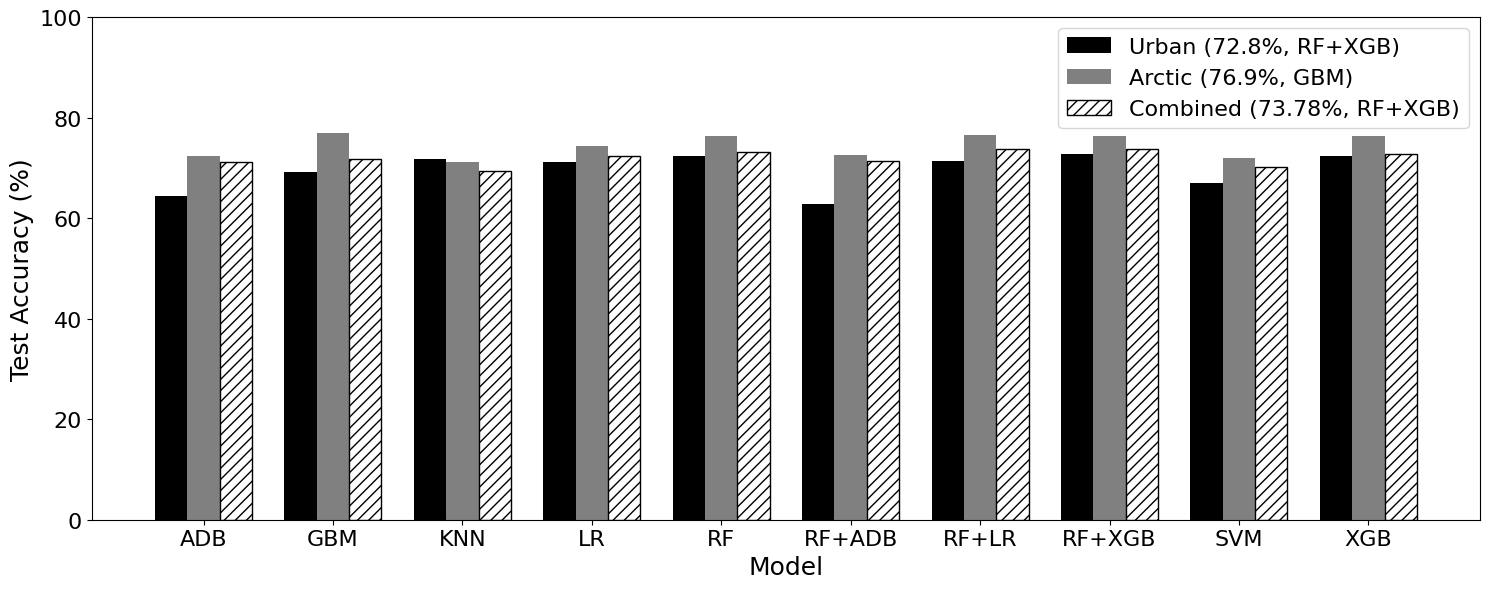

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("accuracy total.csv", index_col=0)
df = df * 100

df_p4 = df.loc[["Urban", "Arctic", "Combined"]]
df_p4_T = df_p4.T

urban_values = df_p4_T["Urban"]
arctic_values = df_p4_T["Arctic"]
combined_values = df_p4_T["Combined"]

fig, ax = plt.subplots(figsize=(15, 6))

x = np.arange(len(urban_values))
width = 0.25  # Width of the bars
bars_urban = ax.bar(x - width, urban_values, width, color="black", label="Urban (72.8%, RF+XGB)")
bars_arctic = ax.bar(x, arctic_values, width, color="gray", label="Arctic (76.9%, GBM)")
bars_combined = ax.bar(x + width, combined_values, width, color="white", edgecolor="black", hatch='///', label="Combined (73.78%, RF+XGB)")

ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(df_p4_T.index, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("Test Accuracy (%)", fontsize=18)
ax.set_xlabel("Model", fontsize=18)
ax.legend(fontsize=16)

plt.tight_layout()
plt.savefig("accuracy_total.png", dpi=300)
plt.show()